In [74]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [75]:
import random

In [76]:
centroids=[(-5,5),(5,5)]
cluster_std=[1,1]

In [77]:
from sklearn.datasets import make_blobs

In [78]:
X,y=make_blobs(n_samples=100,cluster_std=cluster_std,centers=centroids,n_features=2,random_state=2)

In [79]:
class KMeans:
    
    def __init__(self,n_clusters,max_iter=100):
        
        self.n_clusters=n_clusters
        self.max_iter=max_iter
        self.centroids=None 
        
    def fit_predict(self,X):
        
        random_index=random.sample(range(0,X.shape[0]),self.n_clusters)
        self.centroids=X[random_index]
        
        for i in range(self.max_iter):
            #assign clusters
            cluster_group=self.assign_clusters(X)
            
            old_centroids=self.centroids
            #move centroids
            self.centroids=self.move_centroids(X,cluster_group)
            #check centroids
            if(old_centroids==self.centroids).all():
                break
            
        return cluster_group
                    
    def assign_clusters(self,X):
        
        cluster_group=[]
        distances=[]
        
        for row in X:
            for centroid in self.centroids:
                distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))
            min_distances=min(distances)
            index_pos=distances.index(min_distances)
            cluster_group.append(index_pos)
            distances.clear()
                   
        return cluster_group  
    
    def move_centroids(self,X,cluster_group):  
       
        new_centroids=[]
        
        cluster_type=np.unique(cluster_group)
        
        for type in cluster_type:
            
           new_centroids.append( X[cluster_group==type].mean(axis=0))
           
        return np.array(new_centroids)
            
        
        
    

In [86]:
kmeans=KMeans(2,100)
y_means=kmeans.fit_predict(X)

In [103]:
y_means=np.array(y_means)

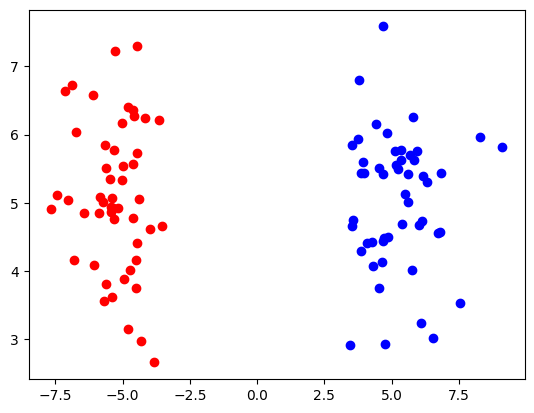

In [105]:
plt.scatter(X[y_means==0,0],X[y_means==0,1],color="red")
plt.scatter(X[y_means==1,0],X[y_means==1,1],color="blue")
plt.show()